In [1]:
!pip install pandas matplotlib seaborn scikit-learn reportlab openai

In [2]:
from google.colab import files

uploaded = files.upload()


Saving archive (17).zip to archive (17) (1).zip


In [3]:
import zipfile
import os

# Get the uploaded file name
zip_filename = list(uploaded.keys())[0]

# Create a folder to extract contents
extract_folder = "adtech_data"
os.makedirs(extract_folder, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Files extracted to folder:", extract_folder)

Files extracted to folder: adtech_data


In [4]:

# List all files in the folder
os.listdir(extract_folder)


['online_advertising_performance_data.csv',
 'Online Advertising Performance Data.txt']

In [5]:
import pandas as pd

# Load the main CSV
extract_folder = "adtech_data"  # folder where you unzipped
df = pd.read_csv(f"{extract_folder}/online_advertising_performance_data.csv")

# Preview the first 5 rows
df.head()


,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,NaN,NaN
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,NaN,NaN
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,NaN,NaN


In [6]:
# Check columns, data types, and missing values
df.info()

# Check first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,NaN,NaN
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,NaN,NaN
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,NaN,NaN


In [7]:
# See all column names in your dataset
df.columns


Index(['month', 'day', 'campaign_number', 'user_engagement', 'banner',
       'placement', 'displays', 'cost', 'clicks', 'revenue',
       'post_click_conversions', 'post_click_sales_amount', 'Unnamed: 12',
       'Unnamed: 13'],
      dtype='object')

In [8]:
# Rename for consistency
df.rename(columns={
    'campaign_number': 'Campaign',
    'displays': 'Impressions',
    'clicks': 'Clicks',
    'cost': 'Cost',
    'revenue': 'Revenue',
    'post_click_conversions': 'Conversions'
}, inplace=True)

# Drop empty columns
df.drop(columns=['Unnamed: 12','Unnamed: 13'], inplace=True)

# Optional: create a Date column from month and day
df['Date'] = pd.to_datetime(df['month'].astype(str) + '-' + df['day'].astype(str) + '-2025', errors='coerce')


In [9]:
# Fill numeric missing values with 0
numeric_cols = ['Clicks', 'Impressions', 'Cost', 'Revenue', 'Conversions']
df[numeric_cols] = df[numeric_cols].fillna(0)

# Fill categorical columns
categorical_cols = ['Campaign','banner','placement']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')



In [10]:
# CTR = Clicks / Impressions
df['CTR'] = df['Clicks'] / df['Impressions']
df['CTR'] = df['CTR'].fillna(0)

# CPC = Cost / Clicks
df['CPC'] = df['Cost'] / df['Clicks']
df['CPC'] = df['CPC'].fillna(0)

# ROI = Revenue / Cost
df['ROI'] = df['Revenue'] / df['Cost']
df['ROI'] = df['ROI'].fillna(0)

# Conversion Rate = Conversions / Clicks
df['ConversionRate'] = df['Conversions'] / df['Clicks']
df['ConversionRate'] = df['ConversionRate'].fillna(0)


In [11]:
from sklearn.ensemble import IsolationForest
import numpy as np


In [12]:
# Features to detect anomalies
features = ['CTR', 'CPC', 'ROI', 'ConversionRate']

X = df[features].copy()

# Replace infinite values (e.g., CPC = cost/0) with 0
X.replace([np.inf, -np.inf], 0, inplace=True)

In [13]:
# Initialize Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit the model
iso_forest.fit(X)

# Predict anomalies (-1 = anomaly, 1 = normal)
df['Anomaly'] = iso_forest.predict(X)


In [14]:
# Filter anomalies
anomalies = df[df['Anomaly'] == -1]

# Show anomalies
anomalies[['Campaign', 'CTR', 'CPC', 'ROI', 'ConversionRate']]

,Campaign,CTR,CPC,ROI,ConversionRate
7,camp 1,0.001350,0.472475,0.388275,1.0
35,camp 1,0.001692,0.377150,0.486411,0.5
37,camp 1,0.142857,0.004500,40.755556,0.0
39,camp 1,0.142857,0.001500,122.266667,0.0
51,camp 1,0.022222,0.011100,16.522523,0.0
...,...,...,...,...,...
15309,camp 1,0.006944,0.107600,0.000000,1.0
15350,camp 3,0.002427,0.409000,0.137653,3.0
15368,camp 3,0.003236,0.003300,17.060606,0.0
15386,camp 3,0.003509,0.160400,0.350998,5.0


In [15]:
!pip install openai
import openai

In [16]:
!pip install --upgrade openai

In [17]:
print(anomalies.columns)

Index(['month', 'day', 'Campaign', 'user_engagement', 'banner', 'placement',
       'Impressions', 'Cost', 'Clicks', 'Revenue', 'Conversions',
       'post_click_sales_amount', 'Date', 'CTR', 'CPC', 'ROI',
       'ConversionRate', 'Anomaly'],
      dtype='object')


In [18]:
!pip install transformers
!pip install sentencepiece
!pip install torch --upgrade


In [19]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

model_name = "distilgpt2"  # Changed to a publicly available model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

llm_pipeline = pipeline("text-generation", model=model, tokenizer=tokenizer, max_new_tokens=150)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu


In [20]:
test_prompt = "Analyze this ad campaign and provide insights:\nCampaign: Campaign A\nCTR: 0.05\nCPC: 0.20\nROI: 1.5\nConversion Rate: 0.02"
result = llm_pipeline(test_prompt)
print(result[0]['generated_text'])


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Analyze this ad campaign and provide insights:
Campaign: Campaign A
CTR: 0.05
CPC: 0.20
ROI: 1.5
Conversion Rate: 0.02
Transparency: 0.02
Credibility: 0.01


In [21]:
def generate_ai_insight_local(campaign, ctr, cpc, roi, conversion_rate):
    prompt = f"""
    You are a marketing analyst. Analyze the following campaign metrics and write a short executive summary:
    Campaign: {campaign}
    CTR: {ctr}
    CPC: {cpc}
    ROI: {roi}
    Conversion Rate: {conversion_rate}
    """
    result = llm_pipeline(prompt, max_new_tokens=150)
    return result[0]['generated_text']


In [22]:
def generate_ai_insight_local(campaign, ctr, cpc, roi, conversion_rate):
    prompt = f"""
    You are a marketing analyst. Analyze the following campaign metrics and write a short executive summary:
    Campaign: {campaign}
    CTR: {ctr}
    CPC: {cpc}
    ROI: {roi}
    Conversion Rate: {conversion_rate}
    """
    result = llm_pipeline(prompt, max_new_tokens=150)
    return result[0]['generated_text']


In [23]:
# Group anomalies by Campaign
grouped = anomalies.groupby('Campaign')

In [24]:
def generate_batch_insight(campaign_name, group_df):
    # Convert numeric stats to dictionary
    stats = group_df[['CTR','CPC','ROI','ConversionRate']].describe().to_dict()

    # Create a batch prompt
    prompt = f"""
    You are a marketing analyst. Analyze {len(group_df)} anomalies for Campaign '{campaign_name}'.
    Here are the summary statistics: {stats}
    Write a short executive summary highlighting important trends or issues.
    """

    # Generate insight using LLM
    result = llm_pipeline(prompt, max_new_tokens=150)
    return result[0]['generated_text']


In [25]:
# Dictionary to store insights
campaign_insights = {}

for campaign, group in grouped:
    campaign_insights[campaign] = generate_batch_insight(campaign, group)

# Add insights back to DataFrame (optional)
anomalies['AI_Insight'] = anomalies['Campaign'].map(campaign_insights)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/tmp/ipython-input-3740928231.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalies['AI_Insight'] = anomalies['Campaign'].map(campaign_insights)


In [26]:
anomalies.loc[:, 'AI_Insight'] = anomalies['Campaign'].map(campaign_insights)


In [27]:
anomalies_detected = anomalies.copy()
anomalies_detected.loc[:, 'AI_Insight'] = anomalies_detected['Campaign'].map(campaign_insights)

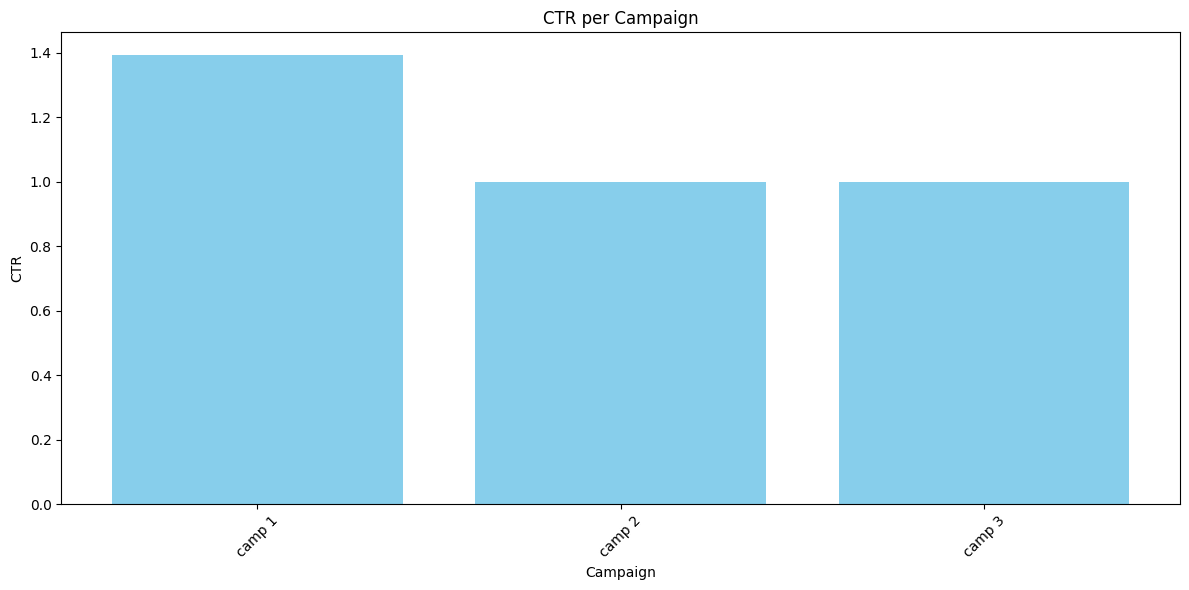

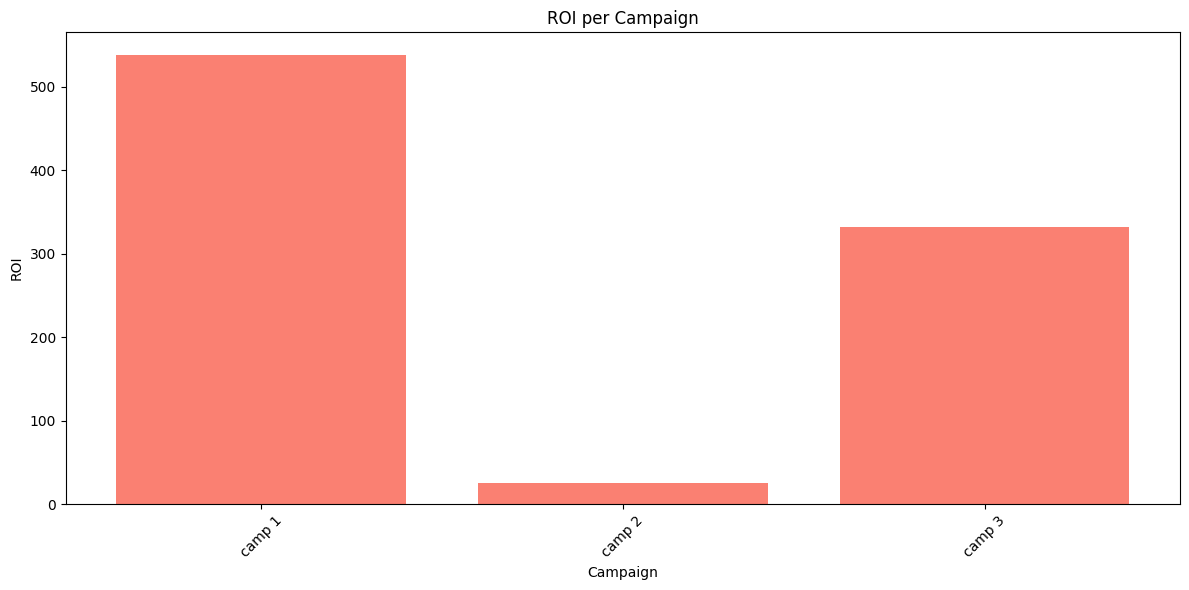

In [28]:
import matplotlib.pyplot as plt

# Example: CTR per campaign
plt.figure(figsize=(12,6))
plt.bar(anomalies_detected['Campaign'], anomalies_detected['CTR'], color='skyblue')
plt.title("CTR per Campaign")
plt.xlabel("Campaign")
plt.ylabel("CTR")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Example: ROI per campaign
plt.figure(figsize=(12,6))
plt.bar(anomalies_detected['Campaign'], anomalies_detected['ROI'], color='salmon')
plt.title("ROI per Campaign")
plt.xlabel("Campaign")
plt.ylabel("ROI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
!pip install weasyprint
from weasyprint import HTML

# Example HTML content
html_content = "<h1>Automated Ad Campaign Report</h1>"

for campaign, group in anomalies_detected.groupby('Campaign'):
    html_content += f"<h2>{campaign}</h2>"
    html_content += f"<p>{group['AI_Insight'].iloc[0]}</p>"

# Generate PDF
HTML(string=html_content).write_pdf("Ad_Campaign_Report.pdf")

DEBUG:fontTools.ttLib.ttFont:Reading 'maxp' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'maxp' table
DEBUG:fontTools.subset.timer:Took 0.006s to load 'maxp'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'maxp'
INFO:fontTools.subset:maxp pruned
DEBUG:fontTools.ttLib.ttFont:Reading 'cmap' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'cmap' table
DEBUG:fontTools.ttLib.ttFont:Reading 'post' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'post' table
DEBUG:fontTools.subset.timer:Took 0.012s to load 'cmap'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'cmap'
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:fpgm dropped
INFO:fontTools.subset:prep dropped
INFO:fontTools.subset:cvt  dropped
DEBUG:fontTools.subset.timer:Took 0.000s to load 'post'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'post'
INFO:fontTools.subset:post pruned
DEBUG:fontTools.ttLib.ttFont:Reading 'glyf' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'glyf' tabl

In [30]:
from google.colab import files
files.download("Ad_Campaign_Report.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
def generate_batch_insight(campaign_name, group_df):
    stats = group_df[['CTR','CPC','ROI','ConversionRate']].describe().to_dict()
    prompt = f"""
    You are a marketing analyst. Analyze {len(group_df)} anomalies for Campaign '{campaign_name}'.
    Here are the summary statistics: {stats}
    Write a short executive summary highlighting important trends or issues.
    """

    # Generate text
    result = llm_pipeline(prompt, max_new_tokens=150)

    # Extract generated text
    summary_text = result[0]['generated_text']
    return summary_text


In [32]:
# Map insights back to anomalies_detected
anomalies_detected.loc[:, 'AI_Insight'] = anomalies_detected['Campaign'].map(campaign_insights)


In [33]:
import plotly.express as px

campaigns = anomalies_detected['Campaign'].unique()

for camp in campaigns:
    df_camp = anomalies_detected[anomalies_detected['Campaign'] == camp]

    # Line chart for CTR, CPC, ROI over entries
    fig = px.line(
        df_camp,
        x=df_camp.index,
        y=['CTR', 'CPC', 'ROI'],
        title=f"Campaign Metrics for {camp}",
        labels={'value':'Metric Value', 'index':'Entry Index'},
        markers=True
    )

    # Add styling
    fig.update_layout(
        title_font_size=22,
        legend_title_text='Metrics',
        template='plotly_white',
        height=500
    )

    fig.show()


/usr/local/lib/python3.12/dist-packages/kaleido/_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [35]:
!pip install -U kaleido


In [36]:
import plotly.express as px
import os

# Ensure kaleido is available
import kaleido


In [38]:
os.makedirs("charts", exist_ok=True)

for camp in campaigns:
    df_camp = anomalies_detected[anomalies_detected['Campaign'] == camp]

    fig = px.line(df_camp, x=df_camp.index, y=['CTR','CPC','ROI','ConversionRate'],
                  title=f"Campaign Metrics for {camp}", markers=True)
    fig.update_layout(template='plotly_white', height=500)

    # Save chart image
    fig.write_image(f"charts/{camp}_metrics.png")  # kaleido is now recognized


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [39]:
campaign_summaries = {}

for camp in df['Campaign'].unique():
    camp_data = df[df['Campaign'] == camp]
    summary_text = f"Analyze {len(camp_data)} rows for Campaign '{camp}'." \
                   f"CTR mean: {camp_data['CTR'].mean():.2f}, CPC mean: {camp_data['CPC'].mean():.2f}, ROI mean: {camp_data['ROI'].mean():.2f}."

    # Generate text using your LLM pipeline
    ai_summary = llm_pipeline(summary_text)[0]['generated_text']
    campaign_summaries[camp] = ai_summary


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [45]:
import matplotlib.pyplot as plt
!pip install fpdf # Install the fpdf library
from fpdf import FPDF
import pandas as pd
import os

if not os.path.exists("charts"):
    os.makedirs("charts")

pdf = FPDF()

for camp in df['Campaign'].unique():
    camp_data = df[df['Campaign'] == camp]

    # Generate chart with matplotlib
    plt.figure(figsize=(8,4))
    plt.plot(camp_data['Date'], camp_data['CTR'])
    plt.title(f"CTR Trend - {camp}")
    chart_file = f"charts/{camp}_CTR.png"
    plt.savefig(chart_file)
    plt.close()

    # Add chart to PDF
    pdf.add_page()
    pdf.set_font("Arial", "B", 16)
    pdf.cell(0, 10, f"Campaign {camp} Analysis", 0, 1)
    pdf.image(chart_file, x=10, y=30, w=180)

# Save PDF
pdf.output("Automated_Ad_Report.pdf")

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=fb4143eb606611b26bb16aa3bee06f8ff53b634b582fd9a0fa07dfd17452b79c
  Stored in directory: /root/.cache/pip/wheels/6e/62/11/dc73d78e40a218ad52e7451f30166e94491be013a7850b5d75
Successfully built fpdf


''

In [46]:
from fpdf import FPDF

pdf = FPDF()

for camp in df['Campaign'].unique():
    pdf.add_page()
    pdf.set_font("Arial", "B", 16)
    pdf.cell(0, 10, f"Campaign {camp} Analysis", 0, 1)
    pdf.image(f"charts/{camp}_CTR.png", x=10, y=30, w=180)

pdf.output("Automated_Ad_Report.pdf")


''

In [47]:
os.listdir("charts")


['camp 3_CTR.png', 'camp 2_CTR.png', 'camp 1_CTR.png']

In [68]:
from fpdf import FPDF
import os

pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.set_font("Arial", "", 12)

# Make sure your charts folder exists
os.makedirs("charts", exist_ok=True)

for camp in campaigns:
    pdf.add_page()
    pdf.set_font("Arial", "B", 16)
    pdf.cell(0, 10, f"Campaign {camp} Executive Summary", ln=True, align="C")
    pdf.ln(10)

    pdf.set_font("Arial", "", 12)
    pdf.multi_cell(0, 8, campaign_insights_readable[camp])


    # Add the chart image
    chart_path = f"charts/{camp}_CTR.png"  # Use your generated chart paths
    if os.path.exists(chart_path):
        pdf.ln(10)
        pdf.image(chart_path, x=10, w=180)

# Save PDF
pdf_output_path = "Automated_Ad_Report.pdf"
pdf.output(pdf_output_path)
files.download(pdf_output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
campaign_insights_readable = {}

# Re-calculate statistics as campaign_insights currently holds AI-generated text
for camp, group_df in anomalies.groupby('Campaign'): # Use 'anomalies' for grouping
    # Calculate descriptive statistics for the relevant columns
    stats_dict = group_df[['CTR','CPC','ROI','ConversionRate']].describe().to_dict()

    summary = f"Campaign {camp} Analysis:\n"
    summary += f"- CTR average: {stats_dict['CTR']['mean']:.4f}, min: {stats_dict['CTR']['min']:.4f}, max: {stats_dict['CTR']['max']:.4f}\n"
    summary += f"- CPC average: {stats_dict['CPC']['mean']:.2f}, min: {stats_dict['CPC']['min']:.2f}, max: {stats_dict['CPC']['max']:.2f}\n"
    summary += f"- ROI average: {stats_dict['ROI']['mean']:.2f}, min: {stats_dict['ROI']['min']:.2f}, max: {stats_dict['ROI']['max']:.2f}\n"
    summary += f"- Conversion Rate average: {stats_dict['ConversionRate']['mean']:.2f}, min: {stats_dict['ConversionRate']['min']:.2f}, max: {stats_dict['ConversionRate']['max']:.2f}\n"

    # Add some simple insights
    if stats_dict['CTR']['mean'] < 0.05:
        summary += "- Warning: CTR is very low.\n"
    if stats_dict['ROI']['mean'] < 1:
        summary += "- ROI is below 1, campaign might be unprofitable.\n"

    campaign_insights_readable[camp] = summary

In [69]:
from fpdf import FPDF
import os

pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.set_font("Arial", "", 12)

os.makedirs("charts", exist_ok=True)  # Ensure charts folder exists

metrics = ['CTR', 'CPC', 'ROI', 'ConversionRate']

for camp in campaigns:
    pdf.add_page()
    pdf.set_font("Arial", "B", 16)
    pdf.cell(0, 10, f"Campaign {camp} Executive Summary", ln=True, align="C")
    pdf.ln(10)

    # Add readable executive summary
    pdf.set_font("Arial", "", 12)
    pdf.multi_cell(0, 8, campaign_insights_readable[camp])
    pdf.ln(5)

    # Add all metric charts
    y_position = pdf.get_y()
    for metric in metrics:
        chart_path = f"charts/{camp}_{metric}.png"
        if os.path.exists(chart_path):
            pdf.image(chart_path, x=10, y=y_position, w=180)
            y_position += 55  # adjust spacing for next chart

# Save final PDF
pdf_output_path = "Automated_Ad_Report_Deck.pdf"
pdf.output(pdf_output_path)

# If using Colab, download automatically
from google.colab import files
files.download(pdf_output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.15).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
